In [0]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os
from IPython.display import Image
import pandas as pd

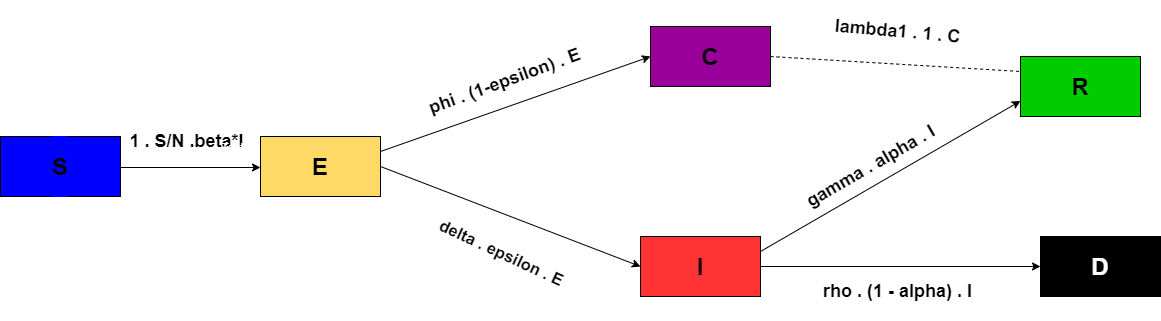

In [2]:
Image(filename='/content/SECIRD (1).png')

In [0]:
def deriv(y, t, N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1):
    S, E, C, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * epsilon * E - phi * (1 - epsilon) * E
    dCdt = phi * (1 - epsilon) * E - lambda1 * C 
    dIdt = delta * epsilon * E - alpha * gamma * I - rho * (1-alpha) * I
    dRdt = lambda1 * C + alpha * gamma * I
    dDdt = rho * (1- alpha) * I
    return dSdt, dEdt, dCdt, dIdt, dRdt, dDdt

In [56]:
a = pd.read_csv('/content/us.csv')
a = a.iloc[54:,:]
a

,date,cases,deaths
54,2020-03-15,3600,68
55,2020-03-16,4507,91
56,2020-03-17,5905,116
57,2020-03-18,8345,157
58,2020-03-19,12413,203
59,2020-03-20,17996,265
60,2020-03-21,24532,343
61,2020-03-22,33061,436
62,2020-03-23,43499,546
63,2020-03-24,53938,731


In [0]:
us_data = a.drop(columns='date')

In [49]:
us_data['cases'].shape[0] # .iloc[0,0]

32

In [0]:
N = 10000000
D = 30.0                # infections lasts four days
gamma = 1.0 / D
delta = 5.0     # incubation period of five days
epsilon = 0.90 
R_0 = 5.0
beta = R_0 * gamma      # R_0 = beta / gamma, so beta = R_0 * gamma
alpha = 0.9             # 10% death rate
rho = 1/9              # 9 days from infection until death
phi = 1.0 / 5.0         # 5 days approx carrier period before recovery
lambda1 = 1.0 / 7.0    # 7 days approx death period taken after infection
S0, E0, C0, I0, R0, D0 = N-us_data.iloc[0,0]-10000-5000 , 10000, 5000, us_data.iloc[0,0], 0, us_data.iloc[0,1]    # initial conditions: one exposed

In [0]:
t = np.linspace(15, 220, 205)     # Grid of time points (in days)
y0 = S0, E0, C0, I0, R0, D0      # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, delta, phi, epsilon, gamma, alpha, rho, lambda1))
S, E, C, I, R, D = ret.T

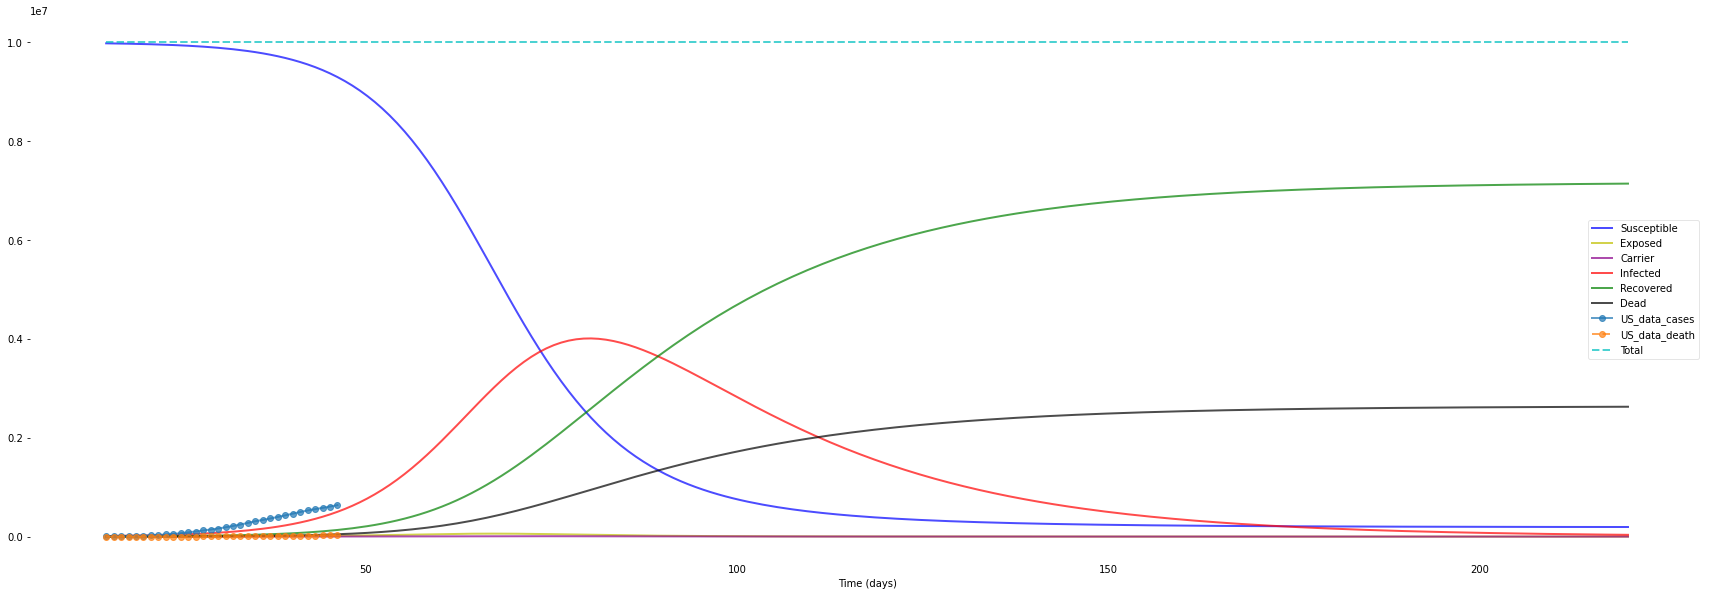

In [145]:
  f, ax = plt.subplots(1,1,figsize=(30,10))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, C, 'darkmagenta', alpha=0.7, linewidth=2, label='Carrier')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t[0:us_data.shape[0]], us_data['cases'], 'o-', alpha=0.7, linewidth=2, label='US_data_cases')
  ax.plot(t[0:us_data.shape[0]], us_data['deaths'], 'o--', alpha=0.7, linewidth=2, label='US_data_death')

  ax.plot(t, S+E+C+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  #ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();